<a href="https://colab.research.google.com/github/ali-talebi/norouz1404/blob/main/RNN_2025_09_25_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Malek_Master/code/DATA_PICTURE_3D_Change.zip

Archive:  /content/drive/MyDrive/Malek_Master/code/DATA_PICTURE_3D_Change.zip
replace DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: أ
error:  invalid response [أ]
replace DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.8 MB/s eta 0:00:00


In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential , Model
from keras.layers import Dense , Dropout , Conv2D , BatchNormalization , Flatten , Conv2DTranspose , Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import visualkeras
from sklearn.model_selection import train_test_split

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path_data = "/content/DATA_PICTURE_3D_Change"

store_data_set = {
					'picture_alpha':[] ,
					'picture_health' : [] ,
					'picture_void' : [] ,
					'picture_void_alpha' : []
				}

def function_conver_and_load_image() :
  for path in os.listdir(path_data) :
    print(path)
    cursur = None
    if path == 'picture_alpha' :
      cursur = 'picture_alpha'
    elif path == 'picture_health' :
      cursur = 'picture_health'
    elif path == 'picture_void' :
      cursur = 'picture_void'
    elif path == 'picture_void_alpha' :
      cursur = 'picture_void_alpha'

    for file in os.listdir(f'{path_data}/{path}') :
      combined_root = f'{path_data}/{path}/{file}'
      print(combined_root)
      df = pd.read_csv(combined_root)
      matrix_picture_z = []
      matrix_picture_y = []
      matrix_picture_x = []
      for index in range(len(df)) :
        value_z = df.iloc[index , 2 ]
        matrix_picture_z.append(value_z)
        value_y = df.iloc[index , 1 ]
        matrix_picture_y.append(value_y)
        value_x = df.iloc[index , 0 ]
        matrix_picture_x.append(value_x)

      matrix_picture_z = np.array(matrix_picture_z).reshape(16,3)
      matrix_picture_y = np.array(matrix_picture_y).reshape(16,3)
      matrix_picture_x = np.array(matrix_picture_x).reshape(16,3)

      matrix_picture = {'x':matrix_picture_x , 'y':matrix_picture_y , 'z':matrix_picture_z }
      store_data_set[cursur].append(matrix_picture)


  return store_data_set
store_data_set = function_conver_and_load_image()



picture_alpha
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.077_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.079_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.026_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.049_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.068_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.055_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.03_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.017_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.005_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.09_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.051_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.062_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.01_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.061_void_0.3

In [23]:
total_health_x_y_z , label_health = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_health' :
      total_health_x_y_z.append(img)
      label_health.append(i)


In [24]:
x_health , y_health , z_health = [] , [] , []

for i in total_health_x_y_z:

  x_health.append(i['x'])
  y_health.append(i['y'])
  z_health.append(i['z'])

In [25]:
x_health = np.array(x_health).reshape(-1 , 16 , 3 , 1 )
y_health = np.array(y_health).reshape(-1 , 16 , 3 , 1 )
z_health = np.array(z_health).reshape(-1 , 16 , 3 , 1 )

In [26]:
TOTAL_X_health_vector = []
TOTAL_Target_X_health_vector = []

window_size = 2   # سه ردیف به عنوان ورودی

for picture in z_health:
    picture_reshaped = picture.reshape(16, 3)  # 16 ردیف، هر ردیف 3 ستون (x,y,z)
    n_samples = picture_reshaped.shape[0] - window_size
    for i in range(n_samples):
        # ورودی = 3 ردیف پشت سر هم
        TOTAL_X_health_vector.append(picture_reshaped[i : i + window_size])   # (3,3)
        # خروجی = ردیف بعد از این 3 تایی
        TOTAL_Target_X_health_vector.append(picture_reshaped[i + window_size]) # (3,)

TOTAL_X_health_vector_array = np.array(TOTAL_X_health_vector).reshape(-1, window_size, 3)
TOTAL_Target_X_health_vector_array = np.array(TOTAL_Target_X_health_vector).reshape(-1, 3)

print(TOTAL_X_health_vector_array.shape)   # (N, 3, 3)
print(TOTAL_Target_X_health_vector_array.shape)  # (N, 3)

(5544, 2, 3)
(5544, 3)


In [27]:
x_train , x_test , y_train , y_test = train_test_split(TOTAL_X_health_vector_array,TOTAL_Target_X_health_vector_array , test_size=0.3 , random_state = 42 )

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ————— تعریف مدل —————
model = Sequential([
    # لایه LSTM: 4 واحد پنهان، فقط خروجی نهایی را باز می‌گرداند
    LSTM(64, input_shape=(2, 3), return_sequences=False),
    # برای کاهش بیش‌برازش، کمی Dropout
    Dropout(0.2),
    # یک لایه میانی برای افزایش ظرفیت غیرخطی مدل
    Dense(16, activation='relu'),
    # لایه خروجی با 3 نورون (برای هر feature یک مقدار)
    Dense(3)
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse']
)
model.summary()

# ————— تنظیم EarlyStopping —————
es = EarlyStopping(
    monitor='val_loss',
    patience=50,
    restore_best_weights=True
)

# ————— آموزش مدل —————
history = model.fit(
    x_train, y_train,
    epochs=300,
    batch_size=64,
    validation_split=0.2,
    # callbacks=[es],
    verbose=2
)

# ————— پیش‌بینی —————
# مثال: پیش‌بینی برای آخرین دو سطر
x_new = x_train[-1][np.newaxis, ...]      # شکل (1,2,3)
y_pred = model.predict(x_new)       # شکل (1,3)
print("پیش‌بینی:", y_pred[0])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,499 (72.26 KB)

 Trainable params: 18,499 (72.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
49/49 - 3s - 57ms/step - loss: 2.1992 - mse: 2.1992 - val_loss: 0.1098 - val_mse: 0.1098
Epoch 2/300
49/49 - 0s - 6ms/step - loss: 0.1008 - mse: 0.1008 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 3/300
49/49 - 0s - 6ms/step - loss: 0.0645 - mse: 0.0645 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 4/300
49/49 - 0s - 6ms/step - loss: 0.0618 - mse: 0.0618 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 5/300
49/49 - 0s - 6ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 6/300
49/49 - 0s - 6ms/step - loss: 0.0564 - mse: 0.0564 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 7/300
49/49 - 0s - 6ms/step - loss: 0.0551 - mse: 0.0551 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 8/300
49/49 - 0s - 6ms/step - loss: 0.0541 - mse: 0.0541 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 9/300
49/49 - 0s - 6ms/step - loss: 0.0519 - mse: 0.0519 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 10/300
49/49 - 0s - 6ms/step - loss: 0.0490 - mse: 0.0490 - val_loss: 0.0169 - val_mse: 0.016

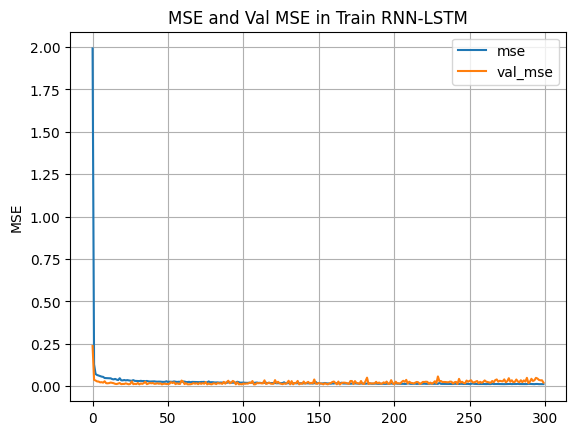

In [ ]:
plt.plot(range(300) , history.history['mse'] , label = 'mse' )
plt.plot(range(300) , history.history['val_mse'] , label = 'val_mse' )
plt.title("MSE and Val MSE in Train RNN-LSTM")
plt.legend()
plt.ylabel("MSE")
plt.grid()
plt.show()

In [ ]:
r = 0
total_vector_error_health = []
TOTAL_MSE_x_HEALTH_TRAIN  = []

window_size = 2   # تعداد ردیف‌های ورودی

for picture in z_health[::4]:
    new_sample_x = []
    new_sample_y = []

    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size  # تعداد نمونه‌ها

    # ساخت دیتای ورودی/خروجی
    for i in range(n_samples):
        # ورودی: 3 ردیف پشت سر هم → (3,3)
        new_sample_x.append(picture_reshaped[i : i + window_size])
        # خروجی: ردیف بعدی
        new_sample_y.append(picture_reshaped[i + window_size])

    # به آرایه numpy تبدیل کن
    new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
    new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

    # پیش‌بینی با مدل
    total_y_pre = []
    for i in new_sample_x_array:
        t = np.expand_dims(i, axis=0)   # شکل (1, window_size, 3)
        y_pre = model.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])

    total_y_pre = np.array(total_y_pre)

    #------------------------------------------------------###
    # محاسبه خطا
    SE = 0
    local_error = []

    for index in range(len(total_y_pre)):
        diff = total_y_pre[index] - new_sample_y_array[index]
        local_error.append(diff)
        SE += np.sum(diff**2) * ( (index/2) + 1 )

    total_vector_error_health.append(local_error)

    # تقسیم بر تعداد کل مقادیر (n_samples * 3 ستون)
    MSE = SE / (n_samples * 3)
    TOTAL_MSE_x_HEALTH_TRAIN.append(MSE)

    r += 1

    # آزادسازی حافظه (اختیاری)
    del new_sample_x, new_sample_y, new_sample_x_array, new_sample_y_array, total_y_pre, picture_reshaped

print("نمونه‌ها پردازش شدند:", r)


نمونه‌ها پردازش شدند: 99


In [29]:
TOTAL_SEQ_ERROR_HEALTH = []

window_size = 2

for picture in z_health[::4]:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    # ساخت دیتای ورودی/خروجی
    new_sample_x = []
    new_sample_y = []
    for i in range(n_samples):
        new_sample_x.append(picture_reshaped[i : i + window_size])
        new_sample_y.append(picture_reshaped[i + window_size])

    new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
    new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

    # پیش‌بینی کل توالی
    total_y_pre = []
    for i in new_sample_x_array:
        t = np.expand_dims(i, axis=0)   # (1, window_size, 3)
        y_pre = model.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])

    total_y_pre = np.array(total_y_pre)

    # -------- انباشت خطا روی طول توالی --------
    diff = total_y_pre - new_sample_y_array
    seq_error = np.sum(diff**2)   # مجموع خطای کل توالی
    avg_seq_error = seq_error / (n_samples * 3)  # میانگین روی کل نقاط

    TOTAL_SEQ_ERROR_HEALTH.append(avg_seq_error)

print("میانگین خطای توالی سالم:", np.mean(TOTAL_SEQ_ERROR_HEALTH))


میانگین خطای توالی سالم: 0.014151928081112914


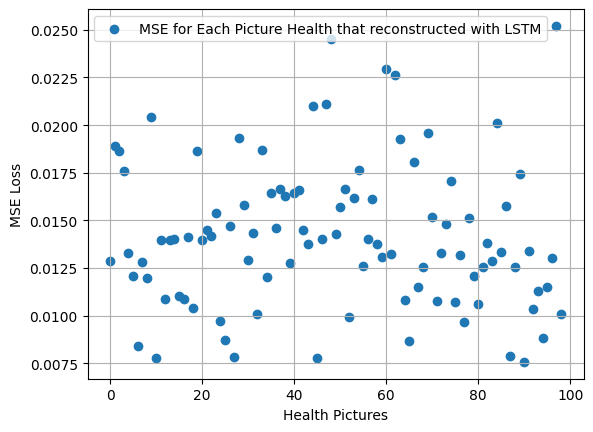

In [31]:
plt.scatter(range(len(TOTAL_SEQ_ERROR_HEALTH)) , TOTAL_SEQ_ERROR_HEALTH , label="MSE for Each Picture Health that reconstructed with LSTM")
plt.legend()
plt.ylabel("MSE Loss")
plt.xlabel("Health Pictures")
plt.grid()
plt.show()

In [ ]:
total_alpha_x_y_z , label_alpha = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_alpha' :
      total_alpha_x_y_z.append(img)
      label_alpha.append(i)


In [32]:
x_alpha , y_alpha , z_alpha = [] , [] , []

for i in total_alpha_x_y_z:

  x_alpha.append(i['x'])
  y_alpha.append(i['y'])
  z_alpha.append(i['z'])


x_alpha = np.array(x_alpha).reshape(-1 , 16 , 3 , 1 )
y_alpha = np.array(y_alpha).reshape(-1 , 16 , 3 , 1 )
z_alpha = np.array(z_alpha).reshape(-1 , 16 , 3 , 1 )

In [ ]:
TOTAL_X_vector_alpha = []
TOTAL_Y_vector_alpha = []

window_size = 2   # تعداد ردیف‌های ورودی

# ساخت مجموعه داده کامل
for picture in z_alpha:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size
    for i in range(n_samples):
        # ورودی: window_size ردیف پشت سر هم
        TOTAL_X_vector_alpha.append(picture_reshaped[i : i + window_size])
        # خروجی: ردیف بعدی
        TOTAL_Y_vector_alpha.append(picture_reshaped[i + window_size])

TOTAL_X_vector_alpha_array = np.array(TOTAL_X_vector_alpha).reshape(-1, window_size, 3)
TOTAL_Y_vector_alpha_array = np.array(TOTAL_Y_vector_alpha).reshape(-1, 3)

#------------------------------------------------------###

r = 0
TOTAL_MSE_alpha = []

for picture in z_alpha[::4]:
    new_sample_x = []
    new_sample_y = []

    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    for i in range(n_samples):
        new_sample_x.append(picture_reshaped[i : i + window_size])   # (3,3)
        new_sample_y.append(picture_reshaped[i + window_size])       # (3,)

    new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
    new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

    # پیش‌بینی
    total_y_pre = []
    for i in new_sample_x_array:
        t = np.expand_dims(i, axis=0)  # (1, window_size, 3)
        y_pre = model.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])

    total_y_pre = np.array(total_y_pre)

    #------------------------------------------------------###
    # محاسبه خطا
    SE = 0
    for index in range(len(total_y_pre)):
        diff = total_y_pre[index] - new_sample_y_array[index]
        SE += np.sum(diff**2) * ((index /2) + 1 )

    MSE = SE / (n_samples * 3)   # به جای 14*3
    TOTAL_MSE_alpha.append(MSE)

    r += 1

    # آزادسازی حافظه (اختیاری)
    del new_sample_x, new_sample_y, new_sample_x_array, new_sample_y_array, total_y_pre, picture_reshaped

print("تعداد تصاویر پردازش‌شده:", r)


تعداد تصاویر پردازش‌شده: 99


In [34]:
TOTAL_SEQ_ERROR_ALPHA = []

window_size = 2
r = 0

for picture in z_alpha[::4]:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    new_sample_x = []
    new_sample_y = []
    for i in range(n_samples):
        new_sample_x.append(picture_reshaped[i : i + window_size])   # ورودی
        new_sample_y.append(picture_reshaped[i + window_size])       # خروجی

    new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
    new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

    # پیش‌بینی کل توالی
    total_y_pre = []
    for i in new_sample_x_array:
        t = np.expand_dims(i, axis=0)  # (1, window_size, 3)
        y_pre = model.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])
    total_y_pre = np.array(total_y_pre)

    # -------- انباشت خطا روی کل توالی --------
    diff = total_y_pre - new_sample_y_array
    seq_error = np.sum(diff**2)                # مجموع خطا روی کل توالی
    avg_seq_error = seq_error / (n_samples*3)  # نرمال‌سازی روی تعداد نقاط

    TOTAL_SEQ_ERROR_ALPHA.append(avg_seq_error)

    r += 1
    del new_sample_x, new_sample_y, new_sample_x_array, new_sample_y_array, total_y_pre, picture_reshaped

print("تعداد تصاویر پردازش‌شده:", r)
print("میانگین خطای توالی معیوب α:", np.mean(TOTAL_SEQ_ERROR_ALPHA))


تعداد تصاویر پردازش‌شده: 99
میانگین خطای توالی معیوب α: 0.016839133609805646


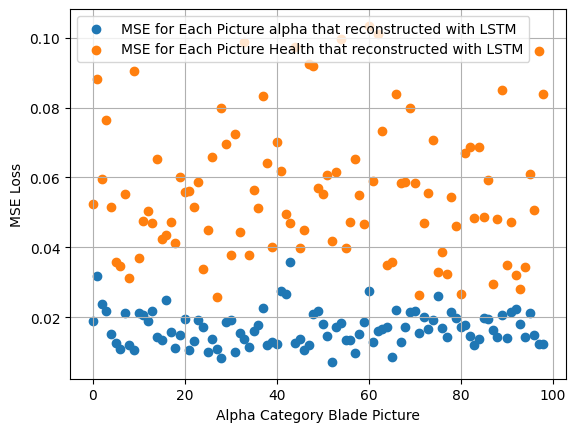

In [35]:
plt.scatter(range(len(TOTAL_SEQ_ERROR_ALPHA)) , TOTAL_SEQ_ERROR_ALPHA , label="MSE for Each Picture alpha that reconstructed with LSTM")
plt.scatter(range(len(TOTAL_MSE_x_HEALTH_TRAIN)) , TOTAL_MSE_x_HEALTH_TRAIN , label="MSE for Each Picture Health that reconstructed with LSTM")

plt.legend()
plt.ylabel("MSE Loss")
plt.xlabel("Alpha Category Blade Picture")
plt.grid()
plt.show()

In [ ]:
total_void_x_y_z, label_void = [], []

for i in store_data_set:
    for img in store_data_set[i]:
        if i == 'picture_void':
            total_void_x_y_z.append(img)
            label_void.append(i)

x_void, y_void, z_void = [], [], []

for i in total_void_x_y_z:
    x_void.append(i['x'])
    y_void.append(i['y'])
    z_void.append(i['z'])

x_void = np.array(x_void).reshape(-1, 16, 3, 1)
y_void = np.array(y_void).reshape(-1, 16, 3, 1)
z_void = np.array(z_void).reshape(-1, 16, 3, 1)

# ---------------------------
# ساخت دیتاست ورودی/خروجی
# ---------------------------
TOTAL_X_vector_void = []
TOTAL_Y_vector_void = []

window_size = 2   # سه ردیف ورودی

for picture in z_void:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size
    for i in range(n_samples):
        TOTAL_X_vector_void.append(picture_reshaped[i : i + window_size])   # (3,3)
        TOTAL_Y_vector_void.append(picture_reshaped[i + window_size])       # (3,)

TOTAL_X_vector_void_array = np.array(TOTAL_X_vector_void).reshape(-1, window_size, 3)
TOTAL_Y_vector_void_array = np.array(TOTAL_Y_vector_void).reshape(-1, 3)

# ---------------------------
# پیش‌بینی و محاسبه خطا
# ---------------------------
r = 0
TOTAL_MSE_void = []

for picture in z_void[::4]:
    new_sample_x, new_sample_y = [], []

    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    for i in range(n_samples):
        new_sample_x.append(picture_reshaped[i : i + window_size])   # (3,3)
        new_sample_y.append(picture_reshaped[i + window_size])       # (3,)

    new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
    new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

    total_y_pre = []
    for i in new_sample_x_array:
        t = np.expand_dims(i, axis=0)   # (1, 3, 3)
        y_pre = model.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])

    total_y_pre = np.array(total_y_pre)

    # ---------------------------
    # محاسبه MSE
    # ---------------------------
    diff = total_y_pre - new_sample_y_array
    SE = np.sum(diff**2) + ((index / 2 ) + 1 )
    MSE = SE / (n_samples * 3)
    TOTAL_MSE_void.append(MSE)

    r += 1
    if r == 200:
        break

print("تعداد تصاویر پردازش‌شده:", r)


تعداد تصاویر پردازش‌شده: 99


In [33]:
total_void_x_y_z, label_void = [], []

for i in store_data_set:
    for img in store_data_set[i]:
        if i == 'picture_void':
            total_void_x_y_z.append(img)
            label_void.append(i)

x_void, y_void, z_void = [], [], []

for i in total_void_x_y_z:
    x_void.append(i['x'])
    y_void.append(i['y'])
    z_void.append(i['z'])

x_void = np.array(x_void).reshape(-1, 16, 3, 1)
y_void = np.array(y_void).reshape(-1, 16, 3, 1)
z_void = np.array(z_void).reshape(-1, 16, 3, 1)


TOTAL_SEQ_ERROR_VOID = []

for picture in z_void[::4]:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    new_sample_x, new_sample_y = [], []
    for i in range(n_samples):
        new_sample_x.append(picture_reshaped[i : i + window_size])
        new_sample_y.append(picture_reshaped[i + window_size])

    new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
    new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

    total_y_pre = []
    for i in new_sample_x_array:
        t = np.expand_dims(i, axis=0)
        y_pre = model.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])

    total_y_pre = np.array(total_y_pre)

    # -------- انباشت خطا روی طول توالی --------
    diff = total_y_pre - new_sample_y_array
    seq_error = np.sum(diff**2)
    avg_seq_error = seq_error / (n_samples * 3)

    TOTAL_SEQ_ERROR_VOID.append(avg_seq_error)

print("میانگین خطای توالی معیوب:", np.mean(TOTAL_SEQ_ERROR_VOID))


میانگین خطای توالی معیوب: 0.022081357408006163


In [ ]:
total_void_alpha_x_y_z, label_void_alpha = [], []

for i in store_data_set:
    for img in store_data_set[i]:
        if i == 'picture_void_alpha':
            total_void_alpha_x_y_z.append(img)
            label_void_alpha.append(i)

x_void_alpha, y_void_alpha, z_void_alpha = [], [], []

for i in total_void_alpha_x_y_z:
    x_void_alpha.append(i['x'])
    y_void_alpha.append(i['y'])
    z_void_alpha.append(i['z'])

x_void_alpha = np.array(x_void_alpha).reshape(-1, 16, 3, 1)
y_void_alpha = np.array(y_void_alpha).reshape(-1, 16, 3, 1)
z_void_alpha = np.array(z_void_alpha).reshape(-1, 16, 3, 1)

# ---------------------------
# ساخت دیتاست ورودی/خروجی
# ---------------------------
TOTAL_X_vector_void_alpha = []
TOTAL_Y_vector_void_alpha = []

window_size = 3   # سه ردیف ورودی

for picture in z_void_alpha:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size
    for i in range(n_samples):
        TOTAL_X_vector_void_alpha.append(picture_reshaped[i : i + window_size])   # (3,3)
        TOTAL_Y_vector_void_alpha.append(picture_reshaped[i + window_size])       # (3,)

TOTAL_X_vector_void_alpha_array = np.array(TOTAL_X_vector_void_alpha).reshape(-1, window_size, 3)
TOTAL_Y_vector_void_alpha_array = np.array(TOTAL_Y_vector_void_alpha).reshape(-1, 3)

# ---------------------------
# پیش‌بینی و محاسبه خطا
# ---------------------------
r = 0
TOTAL_MSE_void_alpha = []

for picture in z_void_alpha[::4]:
    new_sample_x, new_sample_y = [], []

    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    for i in range(n_samples):
        new_sample_x.append(picture_reshaped[i : i + window_size])   # (3,3)
        new_sample_y.append(picture_reshaped[i + window_size])       # (3,)

    new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
    new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

    total_y_pre = []
    for i in new_sample_x_array:
        t = np.expand_dims(i, axis=0)   # (1, 3, 3)
        y_pre = model.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])

    total_y_pre = np.array(total_y_pre)

    # ---------------------------
    # محاسبه خطا (MAE یا MSE)
    # ---------------------------
    diff = total_y_pre - new_sample_y_array
    SE = np.sum(diff**2)   # اگر خطای مربعی می‌خوای
    # SE = np.sum(np.abs(diff))  # اگر خطای مطلق می‌خوای

    MSE = SE / (n_samples * 3)
    TOTAL_MSE_void_alpha.append(MSE)

    r += 1
    if r == 200:
        break

print("تعداد تصاویر پردازش‌شده:", r)


تعداد تصاویر پردازش‌شده: 99


In [38]:
total_void_alpha_x_y_z, label_void_alpha = [], []

for i in store_data_set:
    for img in store_data_set[i]:
        if i == 'picture_void_alpha':
            total_void_alpha_x_y_z.append(img)
            label_void_alpha.append(i)

x_void_alpha, y_void_alpha, z_void_alpha = [], [], []

for i in total_void_alpha_x_y_z:
    x_void_alpha.append(i['x'])
    y_void_alpha.append(i['y'])
    z_void_alpha.append(i['z'])

x_void_alpha = np.array(x_void_alpha).reshape(-1, 16, 3, 1)
y_void_alpha = np.array(y_void_alpha).reshape(-1, 16, 3, 1)
z_void_alpha = np.array(z_void_alpha).reshape(-1, 16, 3, 1)



TOTAL_SEQ_ERROR_VOID_ALPHA = []

window_size = 3
r = 0

for picture in z_void_alpha[::4]:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    # ساخت دیتای ورودی/خروجی
    new_sample_x, new_sample_y = [], []
    for i in range(n_samples):
        new_sample_x.append(picture_reshaped[i : i + window_size])   # ورودی
        new_sample_y.append(picture_reshaped[i + window_size])       # خروجی

    new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
    new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

    # پیش‌بینی کل توالی
    total_y_pre = []
    for i in new_sample_x_array:
        t = np.expand_dims(i, axis=0)   # (1, window_size, 3)
        y_pre = model.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])
    total_y_pre = np.array(total_y_pre)

    # -------- انباشت خطا روی کل توالی --------
    diff = total_y_pre - new_sample_y_array
    seq_error = np.sum(diff**2)                # مجموع خطا روی کل توالی
    avg_seq_error = seq_error / (n_samples*3)  # میانگین خطا روی تمام نقاط

    TOTAL_SEQ_ERROR_VOID_ALPHA.append(avg_seq_error)

    r += 1
    if r == 200:
        break

print("تعداد تصاویر پردازش‌شده:", r)
print("میانگین خطای توالی void_alpha:", np.mean(TOTAL_SEQ_ERROR_VOID_ALPHA))


تعداد تصاویر پردازش‌شده: 99
میانگین خطای توالی void_alpha: 0.13490643290712853


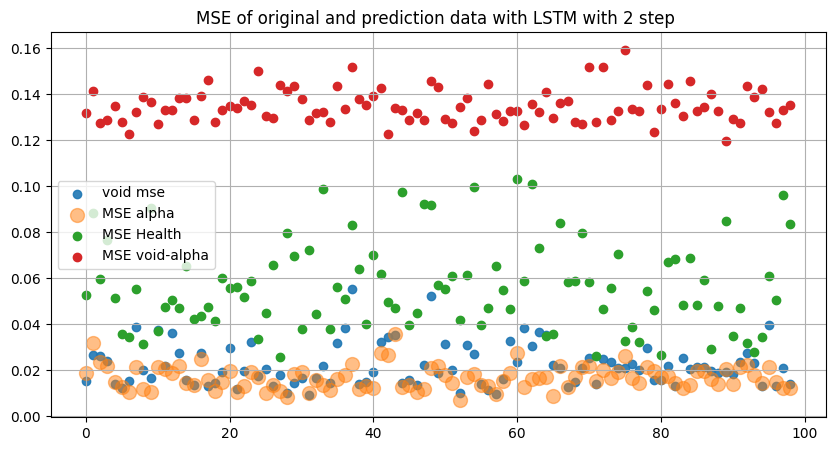

In [42]:
plt.figure(figsize = (10 , 5 ))
plt.scatter(range(len(TOTAL_SEQ_ERROR_VOID)) , TOTAL_SEQ_ERROR_VOID , label="void mse" , alpha = 0.9 )
plt.scatter(range(len(TOTAL_SEQ_ERROR_ALPHA)) , TOTAL_SEQ_ERROR_ALPHA , label="MSE alpha" , alpha = 0.5 , s = 100  )
plt.scatter(range(len(TOTAL_MSE_x_HEALTH_TRAIN)) , TOTAL_MSE_x_HEALTH_TRAIN , label="MSE Health")
plt.scatter(range(len(TOTAL_SEQ_ERROR_VOID_ALPHA)) , TOTAL_SEQ_ERROR_VOID_ALPHA , label="MSE void-alpha")
plt.grid()
plt.title("MSE of original and prediction data with LSTM with 2 step ")
plt.legend()
plt.show()